In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', -1)
from time import time
import re
import string
import os
from pprint import pprint
import collections
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
np.random.seed(37)

C:\Users\skq1922\.conda\envs\PythonData\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# chart_path = "data.csv"
sent_df = pd.read_csv('data.csv')
# sent_df['average_score'].describe()
sent_df.sort_values(by="average_score", ascending=False).head(15)
# sent_df.head(15)

,name,count,average_score
294,sounds,1,0.886305
295,delish,1,0.886305
298,lol,1,0.886305
297,waterymouth,1,0.886305
296,raspa,1,0.886305
293,juicy,1,0.886305
94,roving,1,0.774259
103,wonderful,1,0.774259
88,channel,1,0.774259
101,himself,1,0.774259


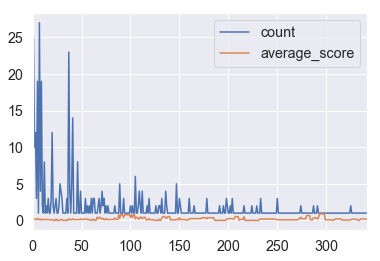

In [4]:
sent_df.plot()

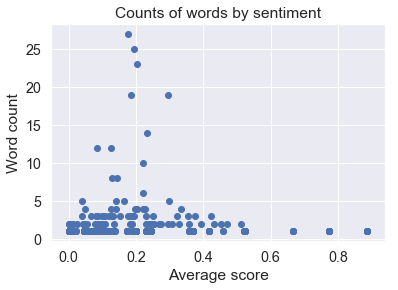

In [10]:
from matplotlib import pyplot as plt
y = sent_df['count']
x = sent_df['average_score']
plt.title("Counts of words by sentiment")
plt.ylabel("Word count")
plt.xlabel("Average score")
plt.scatter(x,y)

In [34]:
sent_df['sentiment'] = pd.cut(sent_df["average_score"],3, labels=["negative", "neutral", "positive"])

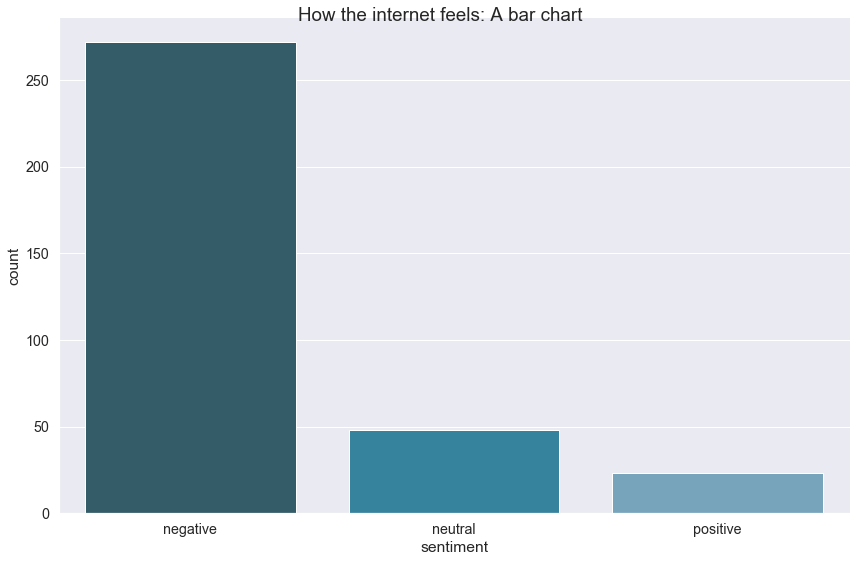

<Figure size 432x288 with 0 Axes>

In [78]:
sns.factorplot(x="sentiment", data=sent_df, kind="count", size=8, aspect=1.5, palette="PuBuGn_d")
plt.suptitle('How the internet feels: A bar chart')
plt.show();

# plt.savefig("../images/bar.png", dpi=300, bbox_inches = "tight")
plt.savefig("../images/bar.png", dpi=300, bbox_inches = "tight")


In [21]:
sent_df['average_score'].describe()

count    343.000000
mean     0.203062  
std      0.202245  
min      0.000857  
25%      0.076587  
50%      0.135894  
75%      0.245601  
max      0.886305  
Name: average_score, dtype: float64

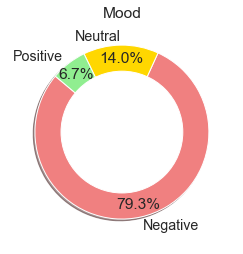

In [72]:
# expenses = fin_mil.dropna(axis=0, subset=['q044'])
colors = ["lightcoral","gold","lightgreen"]
labels = ['Negative','Neutral','Positive']
plt.pie(sent_df["sentiment"].value_counts(), labels = labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140,pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)
plt.title("Mood")
# plt.title(title, y=1.08)
plt.savefig("../images/mood.png", dpi=300, bbox_inches = "tight")
plt.show()